# Analyse Exploratoire

### Import des modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn.objects as so

In [6]:
pd.options.display.max_columns = None

### Analyse Exploratoire

In [8]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [9]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [10]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [11]:
# Sélection les bâtiments non destinés à l'habitation
building_consumption['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [12]:
non_residential_building = ['Hotel', 'K-12 School', 'University', 'Small- and Mid-Sized Office','Self-Storage Facility', 'Warehouse', 'Large Office',
                   'Medical Office', 'Retail Store','Hospital', 'Distribution Center','Worship Facility','Senior Care Community',
                   'Supermarket / Grocery Store', 'Laboratory','Refrigerated Warehouse', 'Restaurant']

In [13]:
non_residential_building_df = building_consumption[building_consumption['PrimaryPropertyType'].isin(non_residential_building)]

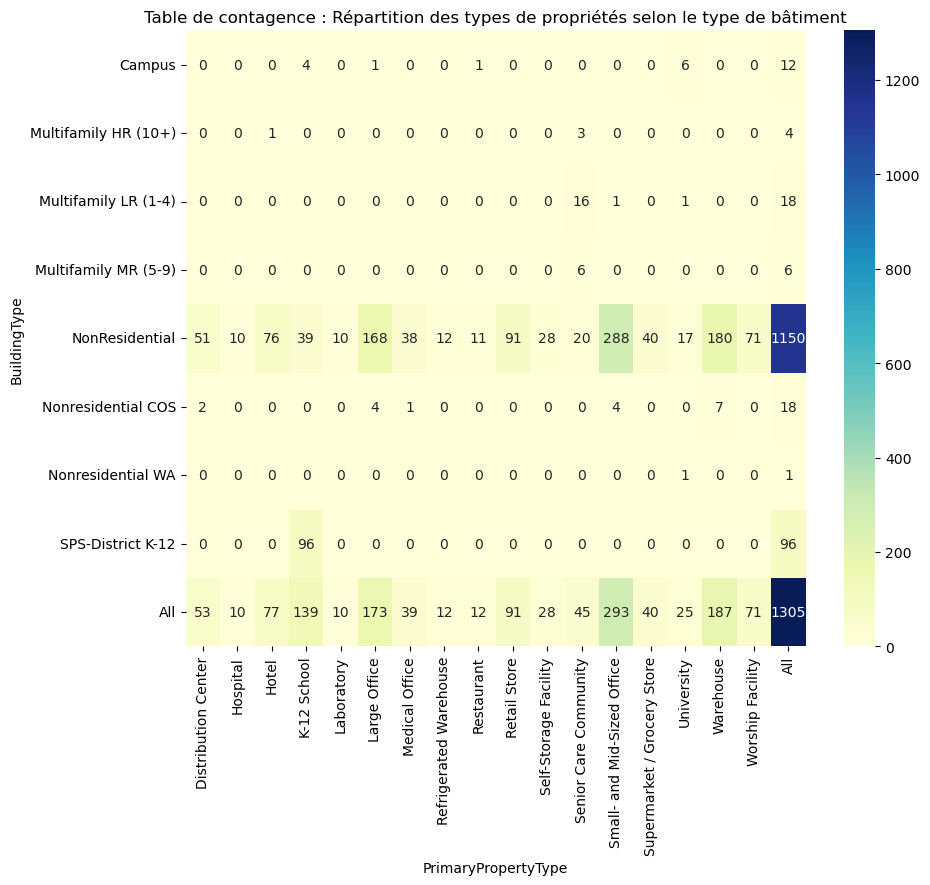

In [14]:
contingency_table = pd.crosstab(non_residential_building_df['BuildingType'], non_residential_building_df['PrimaryPropertyType'], margins=True)

plt.figure(figsize=(10,8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")


plt.title('Table de contagence : Répartition des types de propriétés selon le type de bâtiment')
plt.show()

- La catégorie « NonResidential » domine largement le jeu de données, représentant la grande majorité des observations (1 150 sur 1 305).

- Au sein de ce groupe, le "Top 3" est mené par les bureaux de petite et moyenne taille (Small and Mid-size office) avec 288 unités, suivis des entrepôts (180) et des grands bureaux (168).

- Bien que leur intitulé soit peu explicite, les autres types de bâtiments regroupent tout de même 155 observations, une part non négligeable de l'échantillon total.

In [16]:
quantitative_col = ['NumberofFloors', 'PropertyGFATotal','NumberofBuildings','ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity']

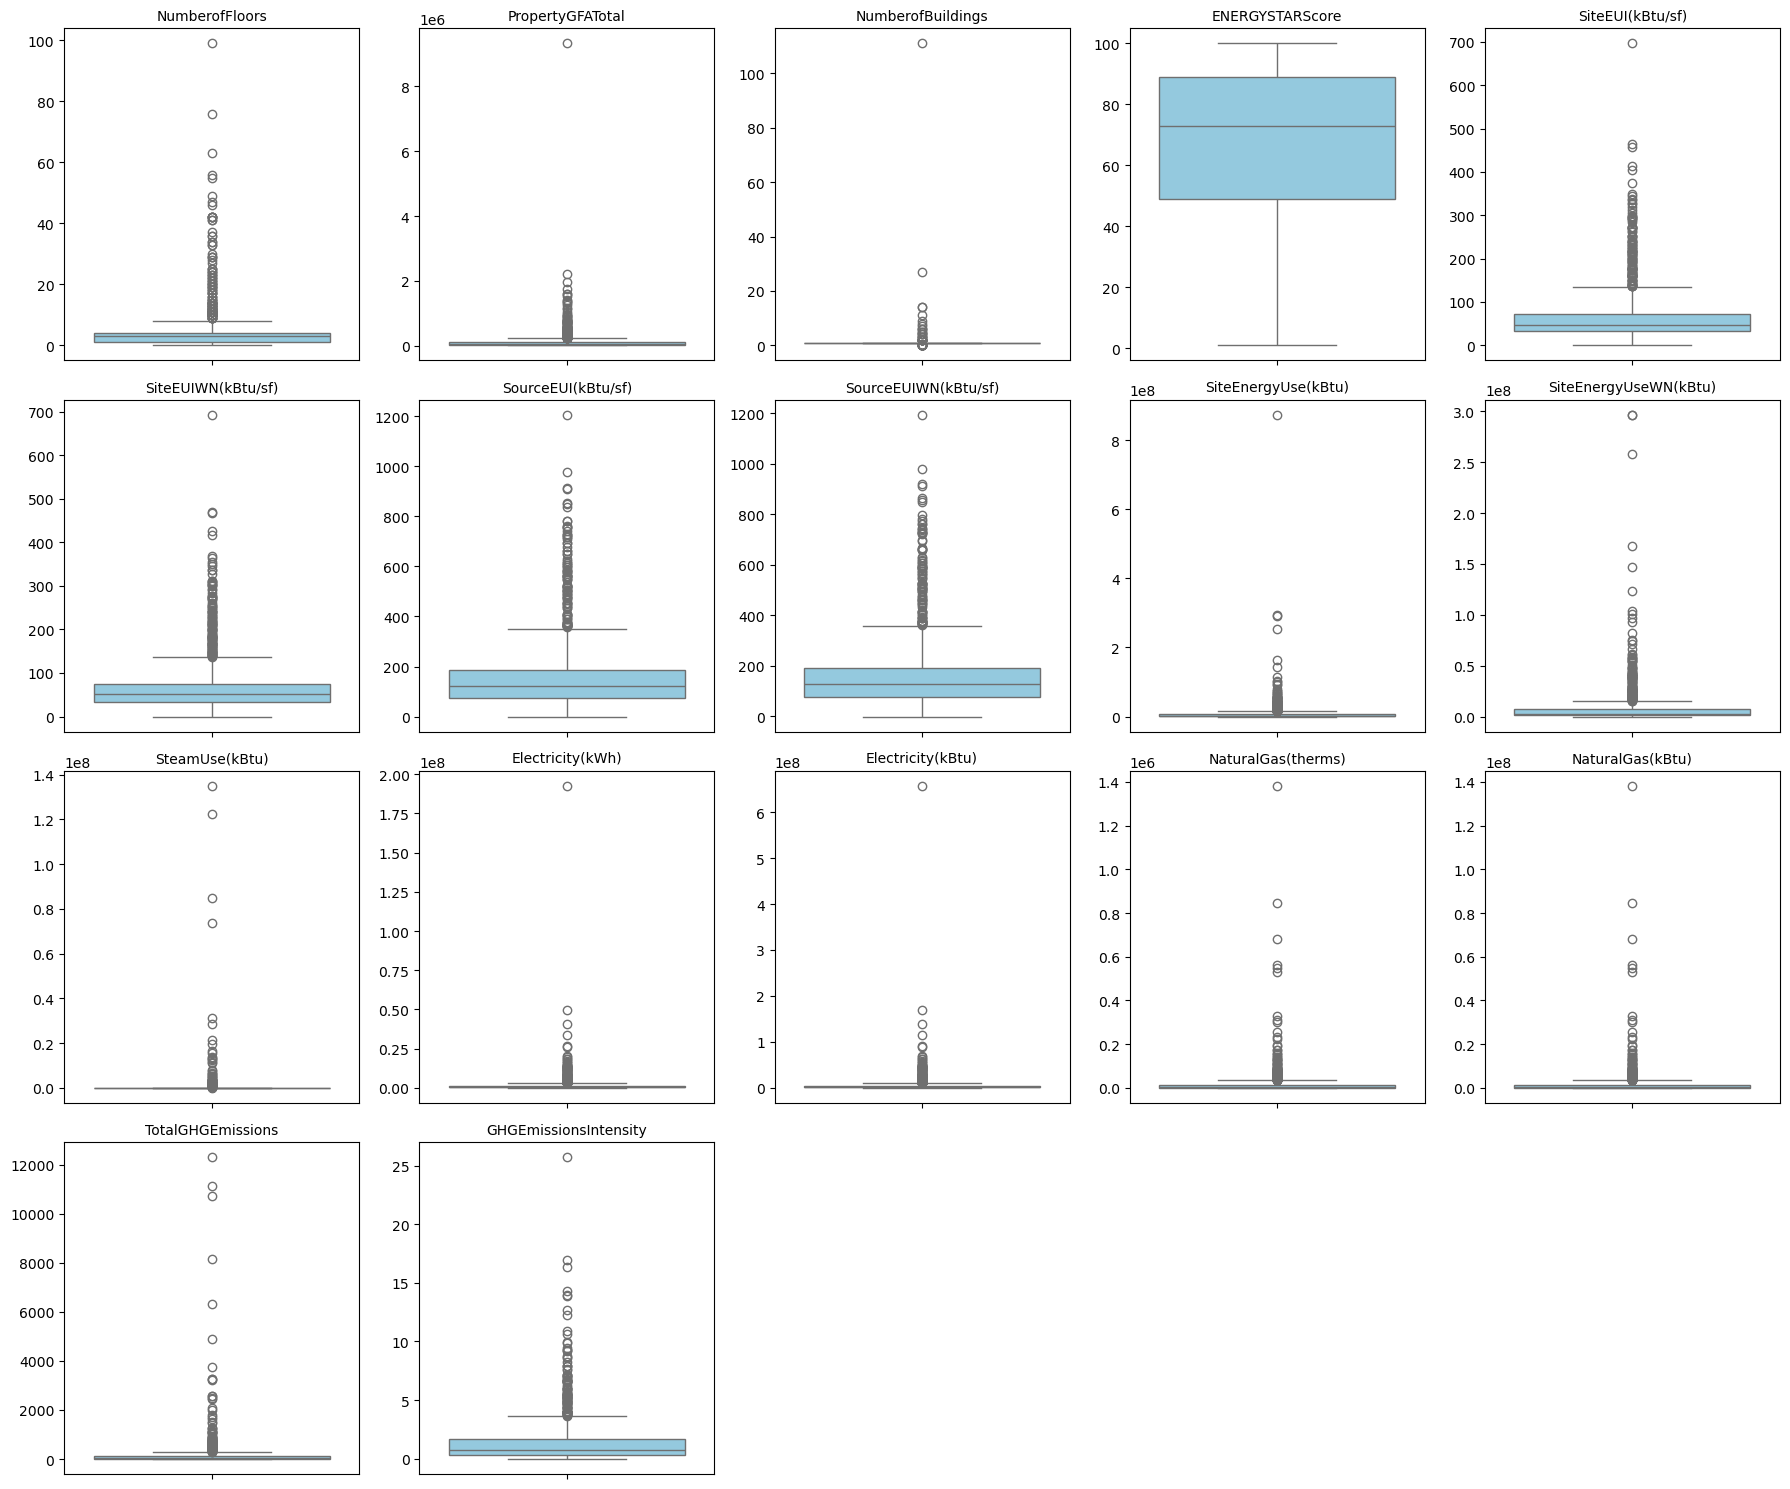

In [17]:
fig, axs = plt.subplots(4, 5, figsize=(18, 15))
axs = axs.flatten()

# On itère sur les colonnes quantitatives
for i, col in enumerate(quantitative_col):
    if i < len(axs):
        # Seaborn gère les NaN automatiquement
        sns.boxplot(data=non_residential_building_df, y=col, ax=axs[i], color='skyblue')
        
        axs[i].set_title(col, fontsize=10)
        axs[i].set_ylabel('') # Nettoie l'axe Y pour plus de clarté
        axs[i].set_xlabel('')

# Masquer les axes vides
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

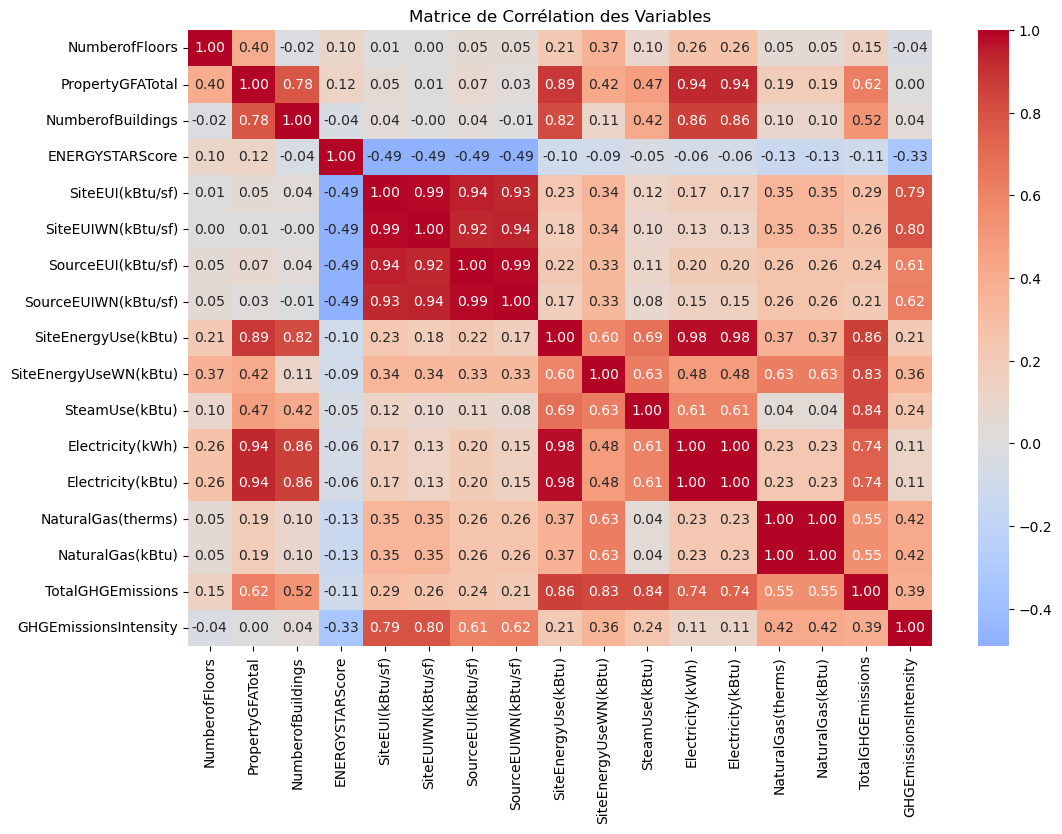

In [18]:
# 1. Calculer la matrice de corrélation
corr = non_residential_building_df[quantitative_col].corr()

# 2. Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# 3. Créer la heatmap
sns.heatmap(corr, 
            annot=True,       # Affiche les valeurs dans les cases
            fmt=".2f",        # Limite à 2 décimales
            cmap='coolwarm',  # Couleur : bleu (froid/négatif) à rouge (chaud/positif)
            center=0)         # Définit le point blanc à 0

plt.title('Matrice de Corrélation des Variables')
plt.show()

<Axes: xlabel='SiteEnergyUse(kBtu)', ylabel='PrimaryPropertyType'>

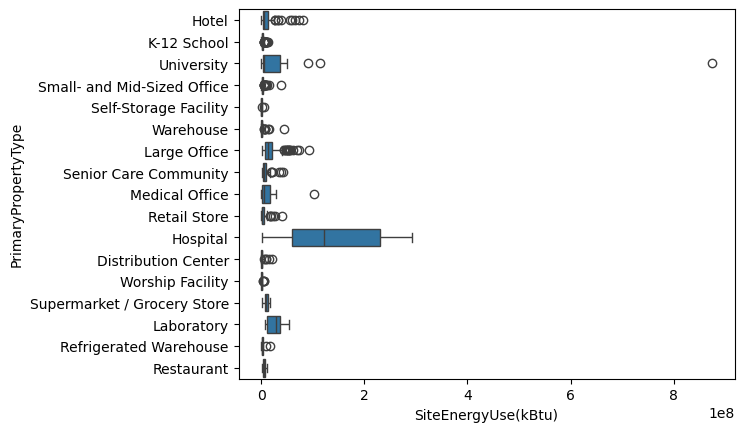

In [19]:
sns.boxplot(data=non_residential_building_df, x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType")

In [20]:
Q1 = non_residential_building_df['SiteEnergyUse(kBtu)'].quantile(0.25)
Q3 = non_residential_building_df['SiteEnergyUse(kBtu)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extraire les outliers
outliers = non_residential_building_df[(non_residential_building_df['SiteEnergyUse(kBtu)'] < lower_bound) | (non_residential_building_df['SiteEnergyUse(kBtu)'] > upper_bound)]

print(f"Nombre d'outliers détectés : {len(outliers)}")
outliers.sort_values('SiteEnergyUse(kBtu)', ascending=False)

Nombre d'outliers détectés : 141


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.656440,-122.310410,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,84985240.0,1.925775e+08,657074389.0,0.000000e+00,0.0,False,NaN,Compliant,NaN,11140.56,1.20
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,4.943834e+07,168683602.0,1.832129e+04,1832129.0,False,NaN,Compliant,NaN,10734.57,9.26
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,4.084256e+07,139354828.0,1.731612e+05,17316120.0,False,NaN,Compliant,NaN,12307.16,6.97
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,3.389250e+07,115641210.0,1.381912e+06,138191238.0,False,NaN,Compliant,NaN,8145.52,9.27
3264,49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,925 Seneca St.,Seattle,WA,98101.0,1979200210,3,EAST,47.609860,-122.327740,1920,1.0,8,374466,0,374466,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1010135.0,NaN,NaN,NaN,NaN,NaN,74.0,162.300003,165.500000,367.899994,369.399994,163945984.0,167207104.0,73885472.0,2.639522e+07,90060497.0,0.000000e+00,0.0,False,NaN,Compliant,NaN,6330.91,16.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,754,2016,NonResidential,Large Office,Eighth & Olive - New,720 Olive Way,Seattle,WA,98101.0,0659000305,7,DOWNTOWN,47.614180,-122.334850,1981,1.0,19,383515,89778,293737,"Medical Office, Office, Parking",Office,312442.0,Parking,84800.0,Medical Office,18799.0,20162015201320122011201020092008,90.0,47.900002,49.000000,150.500000,153.800003,15878689.0,16228155.0,0.0,4.653777e+06,15878687.0,0.000000e+00,0.0,False,NaN,Compliant,NaN,110.70,0.29
504,685,2016,NonResidential,Large Office,818 Stewart,818 Stewart Street,Seattle,WA,98101.0,2285050000,7,DOWNTOWN,47.615670,-122.335030,2008,1.0,14,362046,0,362046,"Office, Other, Parking",Office,232443.0,Parking,97874.0,Other,3534.0,20172015,86.0,66.599998,66.599998,207.800003,207.800003,15725581.0,15725581.0,0.0,4.56241

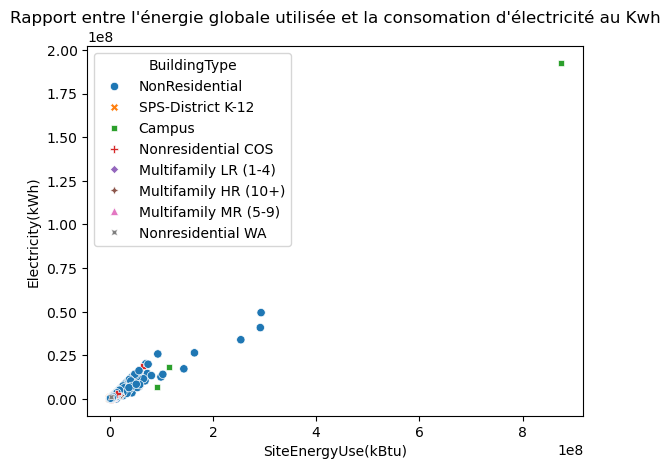

In [21]:
sns.scatterplot(data=non_residential_building_df, x="SiteEnergyUse(kBtu)", y="Electricity(kWh)", hue="BuildingType",style="BuildingType")
plt.title("Rapport entre l'énergie globale utilisée et la consomation d'électricité au Kwh")
plt.show()

C:\Users\nnaoui.BMIGROUP\AppData\Local\Temp\ipykernel_22108\3016931614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_residential_building_df['SiteEnergyUseNormalized'] = non_residential_building_df["SiteEnergyUse(kBtu)"] / non_residential_building_df["NumberofBuildings"]


<Axes: xlabel='SiteEnergyUseNormalized', ylabel='PrimaryPropertyType'>

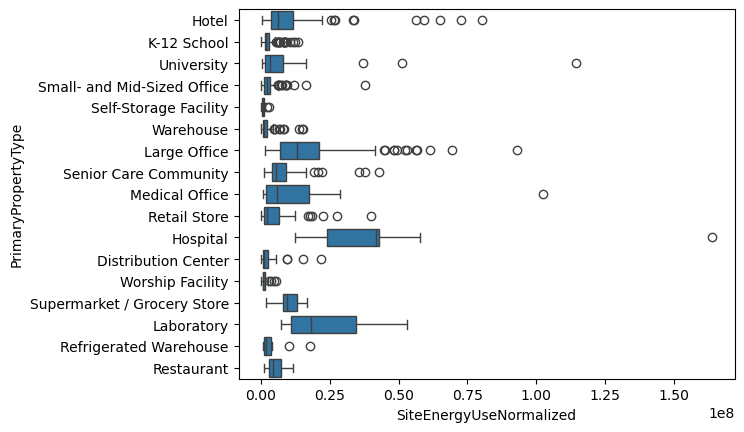

In [22]:
non_residential_building_df['SiteEnergyUseNormalized'] = non_residential_building_df["SiteEnergyUse(kBtu)"] / non_residential_building_df["NumberofBuildings"]
sns.boxplot(data=non_residential_building_df, x="SiteEnergyUseNormalized", y="PrimaryPropertyType")

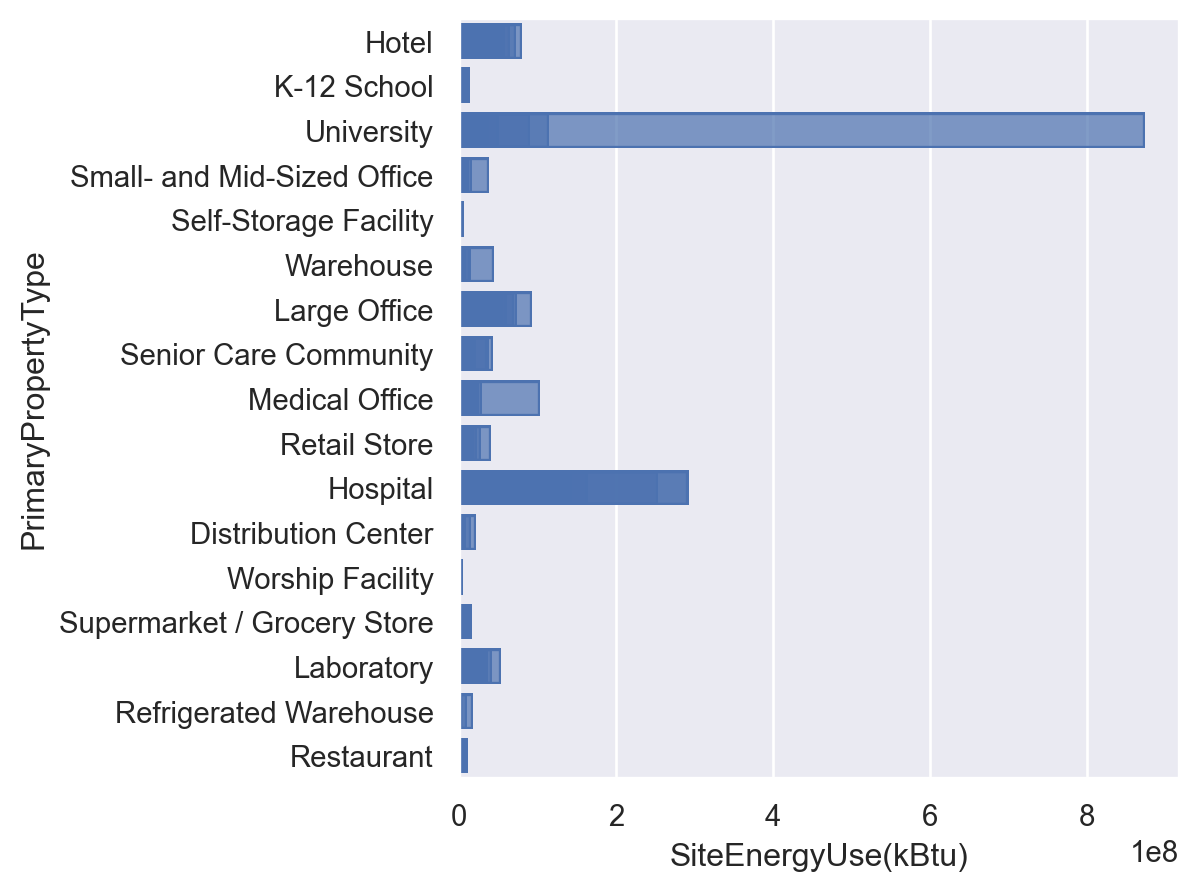

In [131]:
so.Plot(non_residential_building_df["SiteEnergyUse(kBtu)"], non_residential_building_df["PrimaryPropertyType"]).add(so.Bar())

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [6]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [7]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [8]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [9]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [10]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE